Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин. Я работаю продуктовым аналитиком, поэтому мои комментарии больше ориентированы на визуальную и смысловую часть проекта, которая ориентирована на внешних пользователей, и меньше на сам код, его чистоту и оптимизацию. 
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №1__

Хороший вариант проекта для первой итерации, нужно будет поправить функцию в тесте, дописать выводы и оформить графики.
</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №2__

Привет. Проект хорошо поправлен, правильно проведен А/Б-тест, найдены все конверсии по воронке и в целом проанализирован датасет. Проект принят!
</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера по новому проекту__

Новый проект будет связан с визуализацией данных и презентацией. Ты можешь заранее к нему подготовиться:  
1) вот тут можно почитать об основах визуализации в Tableau — https://stepik.org/course/56280/promo  
2) а вот тут ты можешь пройти новый бесплатный курс от Яндекс.Практикума по презентациям — https://praktikum.yandex.ru/profile/visual-presentation/    

</div>

# Анализ поведения пользователей мобильного приложения

Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше.

1. [Предобработка данных](#start)
    * [Вывод](#conclusion1)
2. [Изучение данных](#data)
    * [Вывод](#conclusion2)
3. [Изучение воронки событий](#funnel)
    * [Вывод](#conclusion3)
4. [Изучение результатов эксперимента](#results)
    * [Вывод](#conclusion4)
5. [Общий вывод](#conclusions)

In [1]:
#!c1.8
%pip install -q -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [1]:
#!c1.8
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go
from scipy import stats as st
import math as mth

In [2]:
#!c1.8
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<a id="start"></a> 
## Предобработка данных

In [3]:
#!c1.8
try:
    data = pd.read_csv('logs_exp.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [4]:
#!c1.8
data.columns = ['event_name', 'user_id', 'event_timestamp', 'group_id']

In [5]:
#!c1.8
data.sample(10)

,event_name,user_id,event_timestamp,group_id
220160,MainScreenAppear,2706335667397018846,1565166484,248
110122,CartScreenAppear,2056649048651349082,1564896221,247
211873,PaymentScreenSuccessful,8309980273750324949,1565123892,246
133491,CartScreenAppear,5996739817823449506,1564937677,248
233457,PaymentScreenSuccessful,6987317229889528118,1565190839,247
71271,PaymentScreenSuccessful,1100162414441257562,1564774056,246
203692,CartScreenAppear,5858656528858890652,1565109123,247
29228,OffersScreenAppear,7238309430968098875,1564676978,248
202700,MainScreenAppear,3059176892016404589,1565107745,246
81888,MainScreenAppear,6664988900969927561,1564821760,246


In [6]:
#!c1.8
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event_name         244126 non-null object
user_id            244126 non-null int64
event_timestamp    244126 non-null int64
group_id           244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
#!c1.8
data['event_name'] = data['event_name'].str.lower()
data.duplicated().sum()

413

In [8]:
#!c1.8
data.drop_duplicates(inplace=True)

In [9]:
#!c1.8
data.loc[data['event_name'] == 'mainscreenappear', ['event_name']] = 'main_screen_appear'
data.loc[data['event_name'] == 'offersscreenappear', ['event_name']] = 'offers_screen_appear'
data.loc[data['event_name'] == 'cartscreenappear', ['event_name']] = 'cart_screen_appear'
data.loc[data['event_name'] == 'paymentscreensuccessful', ['event_name']] = 'payment_screen_successful'

In [10]:
data['event_datetime'] = pd.to_datetime(data['event_timestamp'], unit='s')

In [11]:
data['event_date'] = data['event_datetime'].dt.date

<a id="conclusion1"></a> 
### Вывод

<p>Пропусков в данных нет.</p>
<p>Дубликаты удалены.</p>
<p>Добавлены столбы с датой и временем ('event_datetime') и с датой ('event_date').</p>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1 (OK)__

Первый раздела сделан хорошо. Проверены основные возможные проблемы в данных.
</div>

<a id="data"></a> 
## Изучение данных

In [12]:
#!c1.8
data['event_name'].value_counts()

main_screen_appear           119101
offers_screen_appear          46808
cart_screen_appear            42668
payment_screen_successful     34118
tutorial                       1018
Name: event_name, dtype: int64

In [13]:
#!c1.8
data['event_name'].count()

243713

In [14]:
#!c1.8
data['user_id'].nunique()

7551

In [15]:
#!c1.8
data.groupby('user_id', as_index=False).agg({'event_name': 'count'})['event_name'].mean()

32.27559263673685

<p>В логе четыре вида событий, общее количество событий - 243 713. Уникальных пользователей - 7 551. На одного пользователя приходится в среднем 32 события.</p>

20.0

0    5
dtype: int64

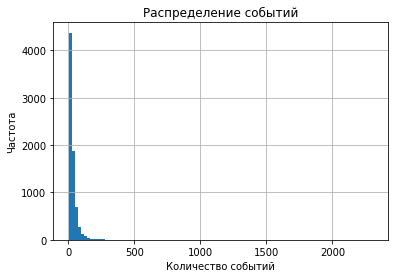

In [16]:
#!c1.8
display(data.groupby('user_id', as_index=False).agg({'event_name': 'count'})['event_name'].median())
display(data.groupby('user_id', as_index=False).agg({'event_name': 'count'})['event_name'].mode())
plt.title('Распределение событий')
plt.xlabel('Количество событий')
plt.ylabel('Частота')
data.groupby('user_id', as_index=False).agg({'event_name': 'count'})['event_name'].hist(bins=100);

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (можно лучше)__

В этом моменте можно было еще посмотреть на медиану и моду. И сделать вывод о распределении наших данных.

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
Распределение событий отличается от нормального, небольшое количество пользователей совершает много событий.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

👍
</div>

In [17]:
#!c1.8
display(data['event_datetime'].max())
display(data['event_datetime'].min())
display(data['event_date'].max() - data['event_date'].min())

Timestamp('2019-08-07 21:15:17')

Timestamp('2019-07-25 04:43:36')

datetime.timedelta(days=13)

<p>Располагаем данными за 13 дней.</p>

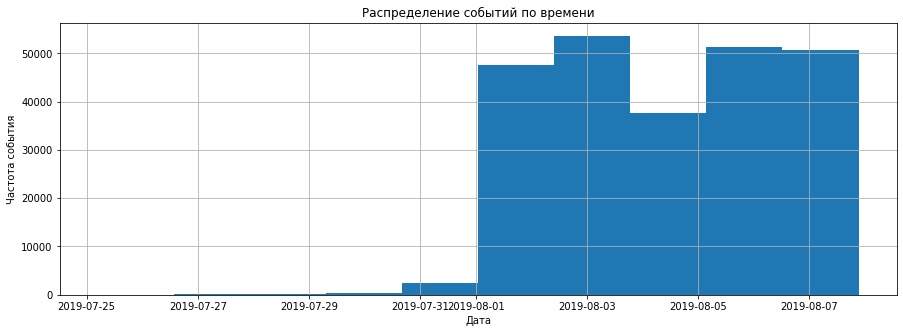

In [18]:
#!c1.8
plt.figure(figsize=(15, 5))
plt.title('Распределение событий по времени')
plt.xlabel('Дата')
plt.ylabel('Частота события')
data['event_datetime'].hist();

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно переделать)__

Проверь, пожалуйста, на всех графиках в проекте наличие заголовков и подписей осей. Не забудь давать заголовкам и подписям осознанные и понятные значения с указанием размерности (шт., млн. и т.д.). Желательно, чтобы заголовок и название осей были на одном языке.

</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

👍
</div>

Данных за июль очень мало, их можно отбросить.

<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (можно лучше)__

В данном случае можно было бы подробнее расмотреть данные за 31 июля и 1 августа и понять когда был точно по часам запущен тест.
</div>

In [19]:
#!c1.8
data = data[data['event_datetime'] >= '2019-08-01']

In [20]:
#!c1.8
data['event_date'].max() - data['event_date'].min()

datetime.timedelta(days=6)

In [21]:
#!c1.8
print('осталось пользователей:', data['user_id'].nunique())
print('осталось событий:', data['event_name'].count())

осталось пользователей: 7534
осталось событий: 240887


В результате уменьшения временного периода (потому что данных за июль очень мало), период уменьшился до 6 дней, количество пользователей - на 17, событий - на 2826.

In [22]:
#!c1.8
data.pivot_table(index='group_id', values='user_id', aggfunc=('count', 'nunique')).rename(columns={'count': 'events', 'nunique': 'users'})

,events,users
group_id,,
246,79302,2484
247,77022,2513
248,84563,2537


<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (нужно переделать)__

В данном пункте ты делаешь проверку на наличие событий в группах, но у нас может быть так, что в одной группе мало пользователей, но они генерируют много событий. Можешь в таблицу включить информацию по пользователям в группах?
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
Добавила. Пользователей и событий примерно одинаково в разных группах.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

👍
</div>

In [23]:
#!c1.8
users_248 = data.query('group_id == 248')['user_id'].unique()
users_246 = data.query('group_id == 246')['user_id'].unique()
users_247 = data.query('group_id == 247')['user_id'].unique()

In [24]:
#!c1.8
display(set(users_248) & set(users_247))
display(set(users_248) & set(users_246))
display(set(users_246) & set(users_247))

set()

set()

set()

В оставшихся данных есть пользователи из всех трёх групп.

Нет пользователей, которые попали в несколько групп.

<a id="conclusion2"></a> 
### Вывод
<p>В логе четыре вида событий, общее количество событий - 240 887. Уникальных пользователей - 7 354. На одного пользователя приходится в среднем 33 события.</p>
<p>Располагаем данными за 6 дней.</p>
<p>Нет пользвателей, которые попали в несколько групп.</p>

<a id="funnel"></a> 
## Изучение воронки событий

In [ ]:
#!c1.8
plt.figure(figsize=(15, 5))
plt.title('Распределение событий')
plt.xlabel('Событие')
plt.ylabel('Частота')
data['event_name'].hist();

В данных есть события:

- tutorial (руководство)
- main_screen_appear (появление главного экрана)
- offers_screen_appear (появление экрана оплаты)
- cart_screen_appear (появление экрана ввода карты)
- payment_screen_successful (появление экрана успешной оплаты)

Реже всего встречается событие tutorial, чаще всего - main_screen_appear. Различия в частотах остальных событий небольшие.

In [25]:
#!c1.8
event_by_users = data.groupby('event_name', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'unique_users'}).sort_values(by='unique_users', ascending=False)
all_users = data['user_id'].nunique()
event_by_users['share'] = event_by_users['unique_users'] / all_users
event_by_users

,event_name,unique_users,share
1,main_screen_appear,7419,0.984736
2,offers_screen_appear,4593,0.609636
0,cart_screen_appear,3734,0.495620
3,payment_screen_successful,3539,0.469737
4,tutorial,840,0.111495


Последовательность событий:

main_screen_appear -> offers_screen_appear -> cart_screen_appear -> payment_screen_successful.

Событие tutorial совершали 11% пользователей, его не нужно учитывать в воронке.

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1  (OK)__

Воронка найдена верно.
</div>

In [26]:
#!c1.8
event_by_users = event_by_users.drop(4)

In [29]:
#!c1.8
fig = go.Figure(go.Funnel(y=event_by_users['event_name'], x=event_by_users['unique_users'], textinfo = "value+percent previous", hoverinfo = "percent initial+percent previous"))
fig.update_layout(title='Воронка событий')
fig.show()

<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (нужно переделать)__

Данному графику нужен заголовок + у тебя неверная информация выводится при наведении на этап воронки в графе ...% of total. У нас физически в воронке на каждом этапе пользователи повторяются, а это метрика считается автоматически без учеты физического смысла в данных. Вот тут разбираются варианты, как это можно поправить — https://github.com/plotly/plotly.py/issues/1644  С помощью параметра hoverinfo можешь сделать вывод только двух параметров + можешь добавить параметр textinfo, который может отобразить информацию на графике.

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
Исправила. Есть способ расположить заголовок по центру?
</div>

<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №2__

Да, вот тут есть варианты с заголовком по центру — https://plotly.com/python/funnel-charts/ Но в немного другом исполнении заголовка.

</div>

Больше всего пользователей (38%) теряется при переходе от главного экрана к экрану оплаты. От первого события (main_screen_appear) до успешной оплаты (payment_screen_successful) доходит 48% пользователей.

<a id="conclusion3"></a> 
### Вывод
<p>В данных есть события:</p>

- tutorial (руководство)
- main_screen_appear (появление главного экрана)
- offers_screen_appear (появление экрана оплаты)
- cart_screen_appear (появление экрана ввода карты)
- payment_screen_successful (появление экрана успешной оплаты)

<p>Реже всего встречается событие tutorial, чаще всего - main_screen_appear. Различия в частотах остальных событий небольшие.</p>
<p>Последовательность событий: main_screen_appear -> offers_screen_appear -> cart_screen_appear -> payment_screen_successful.</p>
<p>Событие tutorial совершали 11% пользователей, его не нужно учитывать в воронке.</p>
<p>Больше всего пользователей (38%) теряется при переходе от главного экрана к экрану оплаты. От первого события (main_screen_appear) до успешной оплаты (payment_screen_successful) доходит 48% пользователей.</p>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1  (OK)__

Этот раздел сделан хорошо.
</div>

<a id="results"></a> 
## Изучение результатов эксперимента

In [30]:
#!c1.8
print('Количество пользователей в разных группах')
data.groupby('group_id')['user_id'].nunique()

Количество пользователей в разных группах


group_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

In [31]:
#!c1.8
def funnel(data, group):
    funnel = data.query('group_id == @group').groupby('event_name').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'users'}).sort_values(by='users', ascending=False).reset_index().drop(4)
    funnel['final_conversion'] = funnel['users'] / funnel.loc[0, 'users']
    for i in range(1, 4):
        funnel.loc[i, 'previous_step_conversion'] = funnel.loc[i, 'users'] / funnel.loc[i-1, 'users']
    funnel.loc[0, 'previous_step_conversion'] = 1
    return funnel

In [32]:
#!c1.8
for i in data['group_id'].unique():
    display('group:', i) 
    display(funnel(data, i))

'group:'

246

,event_name,users,final_conversion,previous_step_conversion
0,main_screen_appear,2450,1.000000,1.000000
1,offers_screen_appear,1542,0.629388,0.629388
2,cart_screen_appear,1266,0.516735,0.821012
3,payment_screen_successful,1200,0.489796,0.947867


'group:'

247

,event_name,users,final_conversion,previous_step_conversion
0,main_screen_appear,2476,1.000000,1.000000
1,offers_screen_appear,1520,0.613893,0.613893
2,cart_screen_appear,1238,0.500000,0.814474
3,payment_screen_successful,1158,0.467690,0.935380


'group:'

248

,event_name,users,final_conversion,previous_step_conversion
0,main_screen_appear,2493,1.000000,1.000000
1,offers_screen_appear,1531,0.614120,0.614120
2,cart_screen_appear,1230,0.493381,0.803396
3,payment_screen_successful,1181,0.473726,0.960163


In [33]:
#!c1.8
for i in data['event_name'].unique():
    print(i)

tutorial
main_screen_appear
offers_screen_appear
cart_screen_appear
payment_screen_successful


<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (нужно переделать)__

Нужно сформулировать гипотезы перед тестом, иначе что мы проверяем? Примерно так:  
1. Нулевая гипотеза: ...  
2. Обратная гипотеза: ...  
    
Так сторонний наблюдатель поймет что ты проверяешь.  
  
А вот в [этой статье](https://ru.qwe.wiki/wiki/Null_hypothesis) можно почитать в целом о формулировании гипотез и как всё это дело началось)
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<p>Проверяем гипотезы о равенстве долей в группах. Сравниваем контрольные группы друг с другом, потом с экспериментальной.</p>
<p>Нулевая гипотеза - между долями нет значимой разницы, обратная гипотеза - между долями есть значимая разница.</p>
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

👍
</div>

In [34]:
#!c1.8
def group_comparison(data, gr1, gr2):
    print('Сравнение групп', gr1, 'и', gr2)
    for i in data['event_name'].unique():
        successes_1 = data.query('group_id == @gr1 & event_name == @i')['user_id'].nunique()
        trials_1 = data.query('group_id == @gr1')['user_id'].nunique()
        successes_2 = data.query('group_id == @gr2 & event_name == @i')['user_id'].nunique()
        trials_2 = data.query('group_id == @gr2')['user_id'].nunique()
        p1 = successes_1 / trials_1
        p2 = successes_2 / trials_2
        p_combined = (successes_1 + successes_2) / (trials_1 + trials_2)
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_1 + 1/trials_2))
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        alpha = 0.05
        print('событие:', i)
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (нужно переделать)__
    
Перепроверь функцию расчета, тут есть ошибка.

</div>

In [35]:
#!c1.8
group_comparison(data, 246, 247)

Сравнение групп 246 и 247
событие: tutorial
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: main_screen_appear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: offers_screen_appear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: cart_screen_appear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: payment_screen_successful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между контрольными группами статистически значимых различий нет.

In [36]:
#!c1.8
group_comparison(data, 246, 248)

Сравнение групп 246 и 248
событие: tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: main_screen_appear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: offers_screen_appear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: cart_screen_appear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: payment_screen_successful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [37]:
#!c1.8
group_comparison(data, 248, 247)

Сравнение групп 248 и 247
событие: tutorial
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: main_screen_appear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: offers_screen_appear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: cart_screen_appear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: payment_screen_successful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [38]:
#!c1.8
unit_control_group = data.copy(deep=True)
unit_control_group.loc[unit_control_group['group_id'] == 247, ['group_id']] = 246
group_comparison(unit_control_group, 246, 248)

Сравнение групп 246 и 248
событие: tutorial
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: main_screen_appear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: offers_screen_appear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: cart_screen_appear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
событие: payment_screen_successful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<a id="conclusion4"></a>
### Вывод 

<p>При уровне статистической значимоси в 5% между контрольными группами статистически значимых различий нет.</p>
<p>При сравнении (уровень статистической значимости - 5%) экспериментальной группы с каждой из контрольных групп и с объединённой контрольной группой статистически значимые различия выявить не удалось.</p>

<div class="alert alert-block alert-warning">
    
__Комментарий от ревьюера №1 (нужно переделать)__
    
Тут еще нужно ответить на вопрос — Посчитайте, сколько проверок статистических гипотез вы сделали.

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
20 проверок. 5 событий, четыре пары групп.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

А/Б-тест сделан хорошо. Так как у нас в рамках теста прошло много проверок, то есть вероятность получить ошибку первого рода в одном из тестов. Кратко об ошибках можно почитать в [Википедии](https://ru.wikipedia.org/wiki/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B3%D0%BE_%D1%80%D0%BE%D0%B4%D0%B0) 
Также можно посмотреть [короткие видео](https://stepik.org/lesson/8085/step/1?unit=1364) об ошибках.

Как это можно решить? Использовать [разные вариации поправок](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7) на количество тестов.
</div>

<a id="conclusions"></a> 
## Общий вывод
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<p><b>Предобработка данных</b></p>
<p>Пропусков в данных нет. Удалено 413 дубликатов. Тип данных в столбце 'event_timestamp' изменён на datetime, добавлены столбы с датой и временем ('event_datetime') и с датой ('event_date'). Удалены данные за июль: 17 пользователей, 2826 событий</p>
</div>
<p><b>Обзор данных</b></p>
<p>В логе четыре вида событий, общее количество событий - 240 887. Уникальных пользователей - 7 354. На одного пользователя приходится в среднем 33 события.</p>
<p>Располагаем данными за 6 дней.</p>
<p><b>Обзор воронки событий</b></p>
<p>Последовательность событий в воронке: main_screen_appear -> offers_screen_appear -> cart_screen_appear -> payment_screen_successful. Событие tutorial не учитываем.</p>
<p>Больше всего пользователей (38%) теряется при переходе от главного экрана к экрану оплаты. От первого события (main_screen_appear) до успешной оплаты (payment_screen_successful) доходит 48% пользователей.</p>
<p><b>Анализ результатов эксперимента</b></p>
<p>При сравнении экспериментальной группы с каждой из контрольных групп и с объединённой контрольной группой статистически значимые различия выявить не удалось (уровень статистической значимости - 5%). Ввиду отстутсвия различий между группами, нельзя сказать, какой шрифт лучше.</p>

<div class="alert alert-block alert-warning">

__Комментарий от ревьюера по общему выводу №1 (можно лучше)__

Что точно нужно поправить:  
— подробнее расписать этап предобработки, были ли дубликаты и сколько из было, сколько удалено юзеров за июль, какие данные были преобразованы в другой тип; 

Что сделано хорошо:  
— представлены основные выводы со всех этапов анализа;  
— расписаны результаты А/Б-теста.  
— хорошее форматирование в выводе, его легко воспринимать.  
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2  (OK)__

👍
</div>

In [ ]:
#!c1.8
